In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [2]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 4, 1, ..., 0, 1, 4], dtype=int32)

In [4]:
kmeans.labels_

array([2, 4, 1, ..., 0, 1, 4], dtype=int32)

In [5]:
kmeans.cluster_centers_

array([[-2.79290307,  2.79641063],
       [ 0.21087045,  2.25606987],
       [-2.80037642,  1.30082566],
       [-1.46467746,  2.28522195],
       [-2.80389616,  1.80117999]])

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

In [7]:
kmeans.transform(X_new)

array([[2.9042344 , 0.33171995, 2.88633901, 1.49219021, 2.81093633],
       [5.84739223, 2.80085976, 5.84236351, 4.47377876, 5.80730058],
       [0.29040966, 3.29592492, 1.71086031, 1.69355335, 1.21475352],
       [0.36159148, 3.22012282, 1.21567622, 1.55027253, 0.72581411]])

In [8]:
# good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
# kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [9]:
kmeans.inertia_

211.60235847389242

In [10]:
from sklearn.cluster import MiniBatchKMeans 
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)


MiniBatchKMeans(n_clusters=5)

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [12]:
import urllib
import os
images_path = os.path.join(".", "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x129423730>)

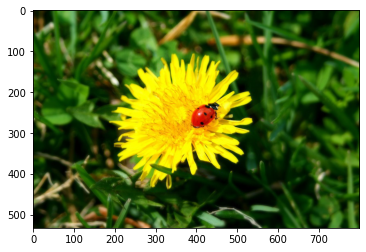

In [13]:
from matplotlib.image import imread # or `from imageio import imread`
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape
plt.imshow(image)

In [14]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=6).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

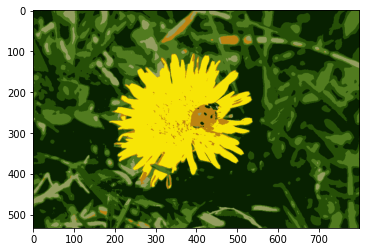

In [15]:
plt.imshow(segmented_img)

In [16]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [18]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9622222222222222

In [19]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50)),
                     ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs",
                                                    max_iter=5000, random_state=42)),])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [20]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

KeyboardInterrupt: 

In [22]:
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

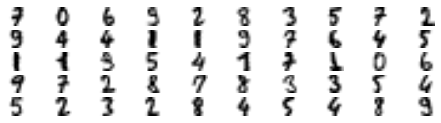

In [23]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [29]:
y_representative_digits = np.array([7, 0, 6, 9, 2, 8, 3, 5, 7, 2,
                                   9, 4, 4, 2, 1, 9, 7, 6, 4, 5,
                                   1, 1, 3, 5, 4, 1, 7, 1, 0, 6,
                                   9, 7, 2, 8, 7, 8, 3, 3, 5, 4,
                                   5, 2, 3, 2, 8, 4, 5, 4, 8, 9])

In [30]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8866666666666667

In [31]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9111111111111111

In [32]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]


In [33]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9133333333333333

In [34]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9688581314878892

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [36]:
dbscan.labels_

array([ 0,  0,  1,  2,  3,  1, -1,  0,  4,  4,  3,  2,  0,  5,  2,  4,  0,
        4,  4,  1,  1,  0,  4,  3,  0,  4,  0,  1,  0,  4,  1,  1,  0,  3,
        4,  3,  0,  4,  0,  0,  1, -1,  0,  4,  2,  3,  4,  2,  0,  4,  4,
        0,  2,  5,  0, -1,  4,  4,  2, -1,  0,  2,  3,  0,  0,  3,  0,  5,
        3,  3,  4,  4,  5,  4,  2,  0,  5,  5,  0,  3,  3,  1,  7,  4,  3,
        2,  3,  4,  5,  4,  2,  0,  4,  4,  4,  0, -1,  2,  0,  2,  1,  4,
        4,  4,  4,  2,  0,  0,  1,  4, -1,  0, -1,  0,  3,  2,  4,  4,  2,
       -1,  4,  2, -1,  4,  4,  3,  1,  1,  0,  3,  5,  3,  2,  5,  0,  4,
        4,  3,  0,  0,  0,  4,  8,  3,  4,  5,  0,  4,  4,  0,  3,  3,  0,
        3,  3,  1,  4,  3,  3,  4, -1,  4,  1,  1,  4,  4,  4,  1,  3,  4,
        4,  1, -1,  4,  2,  6, -1,  4, -1,  4,  4, -1,  2,  1,  4,  3,  1,
        4,  3,  4,  0,  4,  5,  2,  0,  6,  4,  4,  2,  6,  4,  4, -1,  4,
        2,  3,  4,  2,  0,  3,  3,  0,  2, -1,  4,  4,  3,  5,  2,  4,  2,
        3,  5,  3,  0,  4

In [37]:
len(dbscan.core_sample_indices_)

810

In [38]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  11,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  26,  27,  28,  29,  30,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  42,  43,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  56,  57,  58,  60,  61,  62,
        63,  64,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  83,  86,  87,  88,  90,  91,  93,  95,
        97,  98,  99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 113,
       114, 115, 116, 117, 118, 120, 121, 123, 124, 125, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 173, 174, 177, 180, 184, 185, 187, 188, 189, 190, 191, 192,
       193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 215, 216, 217, 218, 219, 220, 22

In [39]:
dbscan.components_

array([[ 1.38148202, -0.38988003],
       [ 2.01432255,  0.15473128],
       [ 0.15531806,  0.09881396],
       ...,
       [ 1.58861797, -0.29080163],
       [-0.7833679 ,  0.56834741],
       [ 0.17833643,  0.95746378]])

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [41]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([2, 1, 5, 0])

In [42]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  6,  7, -1])

In [47]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [48]:
gm.weights_

array([0.21305423, 0.59124484, 0.19570094])

In [49]:
gm.means_

array([[ 1.71766908, -0.081854  ],
       [ 0.47839939,  0.27012802],
       [-0.75998265,  0.54098038]])

In [50]:
gm.covariances_

array([[[ 0.06083843,  0.06572078],
        [ 0.06572078,  0.08698313]],

       [[ 0.16761139, -0.10269342],
        [-0.10269342,  0.28831716]],

       [[ 0.04546031,  0.05641663],
        [ 0.05641663,  0.08737975]]])

In [51]:
gm.converged_

True

In [54]:
gm.n_iter_

16

In [55]:
gm.predict(X)

array([0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0,
       2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1,

In [57]:
gm.predict_proba(X)

array([[9.04064603e-001, 9.59353974e-002, 3.10542423e-183],
       [9.99778586e-001, 2.21413812e-004, 2.04992040e-220],
       [3.11143997e-056, 1.00000000e+000, 3.06344701e-035],
       ...,
       [9.85648068e-001, 1.43519317e-002, 1.89897712e-202],
       [1.28282075e-175, 2.52167648e-003, 9.97478324e-001],
       [1.21262570e-107, 1.00000000e+000, 3.30734339e-011]])

In [59]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.48916902, -0.36686743],
       [ 0.39267941,  0.4224409 ],
       [ 0.27707551,  0.3176324 ],
       [-0.92826163,  0.16460251],
       [-0.84104415,  0.37847001],
       [-0.66915787,  0.68363749]])

In [60]:
y_new

array([0, 1, 1, 2, 2, 2])

In [61]:
gm.score_samples(X)

array([-8.39464477e-01, -8.59405244e-01, -1.33925934e+00, -1.10956441e+00,
       -2.10470775e+00, -1.66805865e+00, -1.98495348e+00, -1.17594801e+00,
       -1.74580072e+00, -4.01034611e-01, -2.00673957e+00, -1.27872314e+00,
       -2.17885191e+00, -1.62558424e+00, -2.60493442e-01, -1.57958374e+00,
       -1.32775369e-01, -2.21079954e+00, -2.09100686e+00, -1.49474389e+00,
       -1.49734672e+00, -3.93963127e-01, -1.46196748e+00, -1.83599735e+00,
       -7.87227361e-02, -1.76204056e+00, -1.26179421e+00, -1.50860053e+00,
       -5.72882545e-01, -1.46859809e+00, -1.66699401e+00, -1.33334206e+00,
       -4.77037996e-01, -1.70984713e+00, -1.66476116e+00, -1.87217765e+00,
       -1.14583533e+00, -2.25174029e+00, -4.23551251e-01, -3.63503836e-01,
       -1.46974124e+00, -3.22814131e-01, -4.44980907e-02, -8.05619930e-01,
       -4.07006448e-02, -2.14467226e+00, -1.38167830e+00, -3.92458356e-01,
       -1.22377950e+00, -1.75682988e+00, -1.53847664e+00, -1.07020524e+00,
       -1.47884905e+00, -

In [62]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [63]:
gm.bic(X)

2763.090214813947

In [65]:
gm.aic(X)

2679.6583750712507

In [66]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.13, 0.14, 0.17, 0.13, 0.12, 0.09, 0.12, 0.1 , 0.  , 0.  ])